## ✅ ReLU 函数定义：

$$
\text{ReLU}(x) = \max(0, x)
$$

也就是说：

- 当 $ x > 0 $ 时：$ \text{ReLU}(x) = x $
- 当 $ x \leq 0 $ 时：$ \text{ReLU}(x) = 0 $

---

## 📈 图像形状：

- **x 轴右边是一条 45° 直线**
- **x 轴左边是平的（恒为0）**
- 看起来像一个拐角，简单粗暴！

---

## 🧠 导数（梯度）：

$$
\frac{d}{dx} \text{ReLU}(x) =
\begin{cases}
1 & \text{if } x > 0 \\
0 & \text{if } x \leq 0
\end{cases}
$$

这就意味着：

- 正区间的梯度是 1，反向传播能畅通无阻；
- 负区间的梯度是 0，神经元“死掉”了（见下方缺点）。

---

## ✅ 优点：

- **计算速度快**：只有一个 max 操作；
- **收敛速度快**：避免了 sigmoid/tanh 的梯度消失问题；
- **激活稀疏**：负值直接变 0，有助于模型稀疏性和泛化能力；

---

## ❌ 缺点：

- **神经元死亡问题（Dying ReLU）**：
  如果某个神经元的输入一直是负的，它就会一直输出 0，并且永远得不到更新；
- 为此，后来衍生出 **Leaky ReLU**、**PReLU**、**ELU** 等变种来缓解这个问题。

---

## 📌 总结一句话：

> ReLU 是目前最主流的激活函数之一，简单高效，尤其适合深层网络，但要注意“神经元死亡”问题。


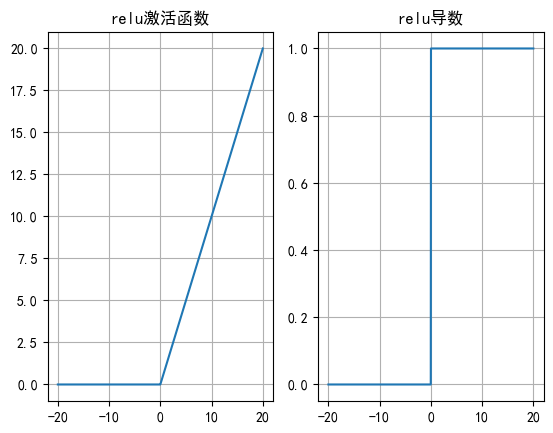

In [1]:
import torch
import matplotlib.pyplot as plt


plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

x = torch.linspace(start=-20, end=20, steps=1000)
y = torch.relu(input=x)

_, axs = plt.subplots(1, 2)
axs[0].plot(x, y)
axs[0].grid()
axs[0].set_title("relu激活函数")


x = torch.linspace(start=-20, end=20, steps=1000, requires_grad=True)
torch.relu(x).sum().backward()
axs[1].plot(x.detach().numpy(), x.grad)
axs[1].grid()
axs[1].set_title("relu导数")
plt.show()